# Explore the BATtle of the Attack Detection ALgorithms (BATADAL) data set

The BATtle of the Attack Detection ALgorithms (BATADAL) data set is from a real-world, medium-sized water distribution system operated through programmable logic controllers and a supervisory control and data acquisition (SCADA) system. The data contains simulated SCADA observations with anomalies at the sensor level that mimics real world attacks on water management systems. It consists of multiple time series containing sensor values of 43 system variables, with each time step labeled as attack or normal operation. The objective is to identify the attacks/anomalies at the time step level.

##### Reference:

Riccardo Taormina and Stefano Galelli and Nils Ole Tippenhauer and Elad Salomons and Avi Ostfeld and Demetrios G. Eliades and Mohsen Aghashahi and Raanju Sundararajan and Mohsen Pourahmadi and M. Katherine Banks and B. M. Brentan and Enrique Campbell and G. Lima and D. Manzi and D. Ayala-Cabrera and M. Herrera and I. Montalvo and J. Izquierdo and E. Luvizotto and Sarin E. Chandy and Amin Rasekh and Zachary A. Barker and Bruce Campbell and M. Ehsan Shafiee and Marcio Giacomoni and Nikolaos Gatsis and Ahmad Taha and Ahmed A. Abokifa and Kelsey Haddad and Cynthia S. Lo and Pratim Biswas and M. Fayzul K. Pasha and Bijay Kc and Saravanakumar Lakshmanan Somasundaram and Mashor Housh and Ziv Ohar; "The Battle Of The Attack Detection Algorithms: Disclosing Cyber Attacks On Water Distribution Networks." Journal of Water Resources Planning and Management, 144 (8), August 2018

### Pre-req: download data

The data set is available on the batadal [website](http://www.batadal.net/data.html). Please download `training dataset 1`, `training dataset 2` and `test dataset` as `BATADAL_dataset03_train_no_anomaly.csv`, `BATADAL_dataset04_train_some_anomaly.csv` and `BATADAL_test_dataset_some_anomaly.csv` respectively. Please save them in `../../data/01_raw/iot`

In [11]:
import pathlib

pathlib.Path("../../data/01_raw/iot").mkdir(parents=True, exist_ok=True)

In [5]:
!wget http://www.batadal.net/data/BATADAL_dataset03.csv -O ../../data/01_raw/iot/BATADAL_dataset03_train_no_anomaly.csv
!wget http://www.batadal.net/data/BATADAL_dataset04.csv -O ../../data/01_raw/iot/BATADAL_dataset04_train_some_anomaly.csv
!wget http://www.batadal.net/data/BATADAL_test_dataset.zip -O ../../data/01_raw/iot/http://www.batadal.net/data/BATADAL_test_dataset.zip


--2022-07-22 23:36:14--  http://www.batadal.net/data/BATADAL_dataset03.csv
Resolving www.batadal.net (www.batadal.net)... 185.199.110.153, 185.199.109.153, 185.199.108.153, ...
Connecting to www.batadal.net (www.batadal.net)|185.199.110.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2940389 (2.8M) [text/csv]
Saving to: ‘../../data/01_raw/iot/BATADAL_dataset03_train_no_anomaly.csv’

../../data/01_raw/i 100%[===================>]   2.80M  --.-KB/s    in 0.01s   

2022-07-22 23:36:14 (236 MB/s) - ‘../../data/01_raw/iot/BATADAL_dataset03_train_no_anomaly.csv’ saved [2940389/2940389]

--2022-07-22 23:36:14--  http://www.batadal.net/data/BATADAL_dataset04.csv
Resolving www.batadal.net (www.batadal.net)... 185.199.111.153, 185.199.110.153, 185.199.109.153, ...
Connecting to www.batadal.net (www.batadal.net)|185.199.111.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225392 (1.2M) [text/csv]
Saving to: ‘../../data/01_raw/iot/BATADAL_d

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

### BATADAL data 
The data set contains hourly historical SCADA operations of a water distribution network. It contains three CSVs: Training Data set 1: year long simulation containing no anomalies, Training Data set 2: 6 month simulation with anomalies, and Test Data set: 3 month simulation with anomalies.

In [2]:
train_no_anom = pd.read_csv("../../data/01_raw/iot/BATADAL_dataset03_train_no_anomaly.csv")
train_some_anom = pd.read_csv("../../data/01_raw/iot/BATADAL_dataset04_train_some_anomaly.csv")
test_with_anom = pd.read_csv("../../data/01_raw/iot/BATADAL_test_dataset_some_anomaly.csv")

In [3]:
# has leading white space
train_some_anom.columns = train_some_anom.columns.str.strip()

In [4]:
train_no_anom.shape, train_some_anom.shape, test_with_anom.shape

((8761, 45), (4177, 45), (2089, 44))

### Data columns

The columns contain info columns datetime and attack, and SCADA readings for 43 water system variables. Columns denoted as L_* are the tank water levels (in meters), columns denoted as P_* are the inlet and outlet pressure for the actuated valve and pumping stations, variables noted as F_* and S_* are the flow (in liters per second) and status of the actuated valve.



In [5]:
train_no_anom.columns

Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

In [6]:
SENSOR_COLS = [c for c in train_no_anom.columns if c not in ["DATETIME", "ATT_FLAG", "timestamp"]]

# Visualization

# Train no anomaly

Let's look at a few days of normal operation

In [12]:
train_no_anom["timestamp"] = pd.to_datetime(train_no_anom["DATETIME"], format="%d/%m/%y %H")
train_no_anom = train_no_anom.set_index(["timestamp"])

In [17]:
train_no_anom.index.min(), train_no_anom.index.max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2015-01-06 00:00:00'))

<AxesSubplot:xlabel='timestamp'>

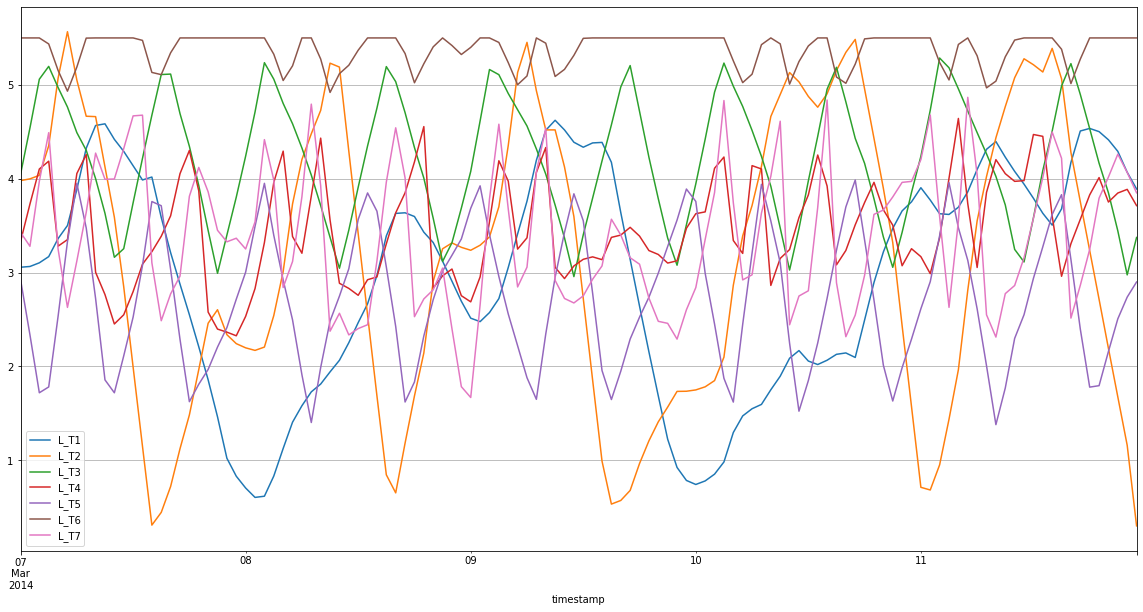

In [23]:
train_no_anom['2014-03-07': '2014-03-11'][[c for c in SENSOR_COLS if "L_T" in c]].plot(figsize=(20,10), grid=True)


<AxesSubplot:xlabel='timestamp'>

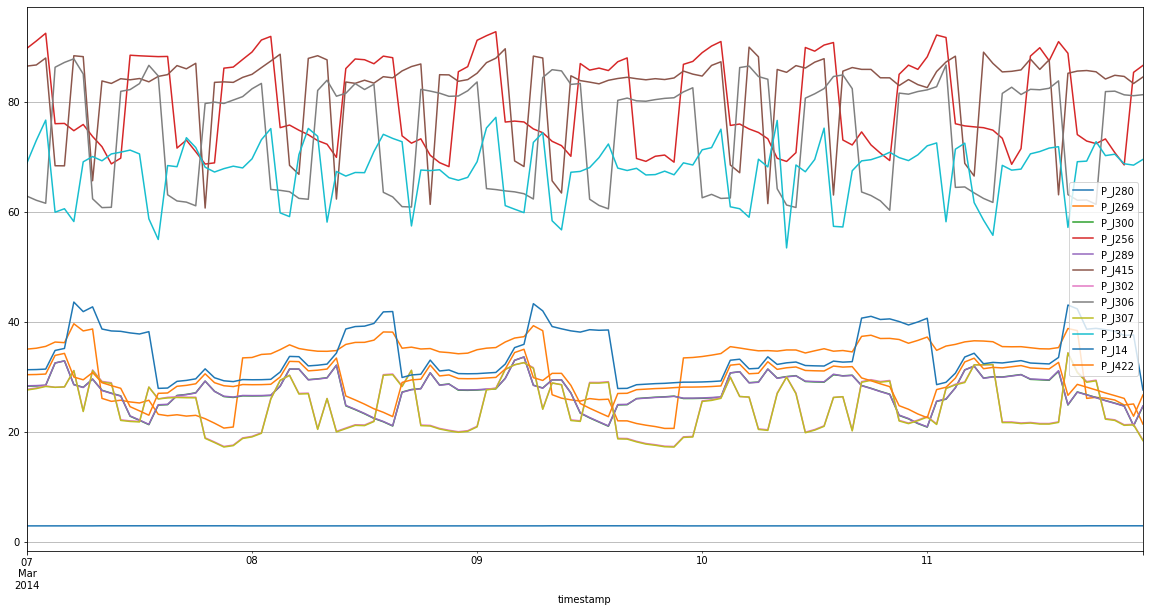

In [24]:
train_no_anom['2014-03-07': '2014-03-11'][[c for c in SENSOR_COLS if "P_" in c]].plot(figsize=(20,10), grid=True)


<AxesSubplot:xlabel='timestamp'>

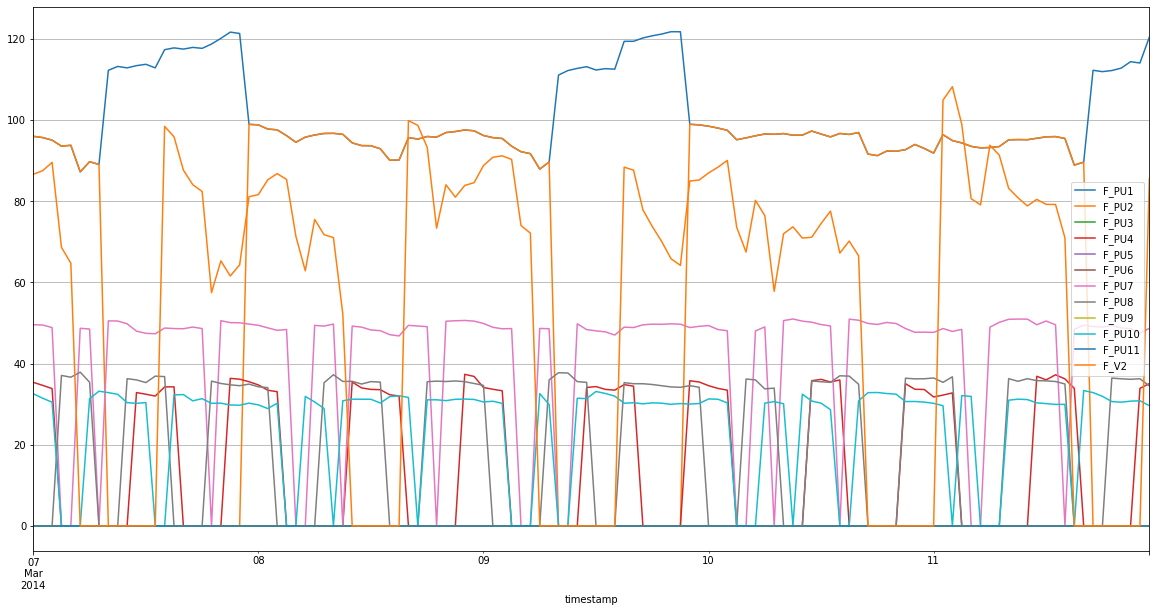

In [25]:
train_no_anom['2014-03-07': '2014-03-11'][[c for c in SENSOR_COLS if "F_" in c]].plot(figsize=(20,10), grid=True)


<AxesSubplot:xlabel='timestamp'>

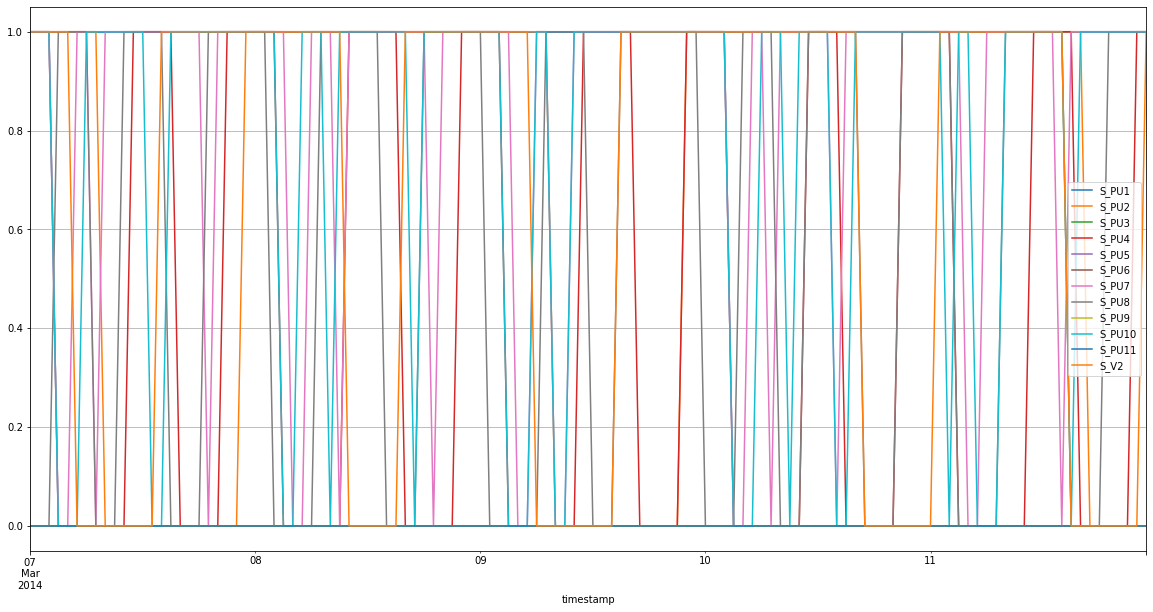

In [26]:
train_no_anom['2014-03-07': '2014-03-11'][[c for c in SENSOR_COLS if "S_" in c]].plot(figsize=(20,10), grid=True)


# Train with anomaly 

The anomalies are described in [Attacks_TrainingDataset2.png](http://www.batadal.net/images/Attacks_TrainingDataset2.png).

Let's look at some details around attack ID 3. Attack 3 lasts for 60 hours from October 9, 2016 at 9 AM to October 11, 2016 at 8 PM. The tank T1 is non-empty during this time, but the attackers trick the system into thinking that L_T1 (tank water levels in m) is low. This results in pumps 1 and 2 (PU1 and PU2) to remain on, resulting in an overflow of tank 1.

To hide this attack, the attackers use a polyline adjustment on L_T1. Let's see if we can see it visually.

In [20]:
train_some_anom["timestamp"] = pd.to_datetime(train_some_anom["DATETIME"], format="%d/%m/%y %H")
train_some_anom = train_some_anom.set_index(["timestamp"])

<AxesSubplot:xlabel='timestamp'>

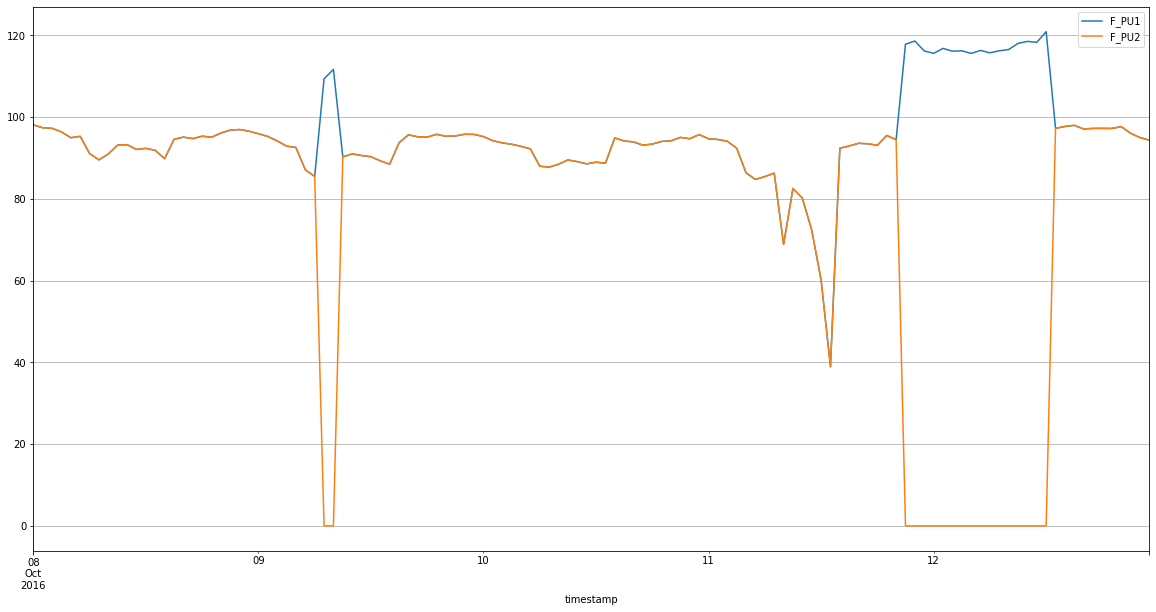

In [21]:
train_some_anom['2016-10-08':'2016-10-12'][["F_PU1", "F_PU2"]].plot(figsize=(20,10), grid=True)

The attackers hide their behavior by masking the true levels of L_T1. In the plot, we see that L_T1 remains reasonable, and unless someone is physically at Tank 1, the anomaly behavior can't be seen.

<AxesSubplot:xlabel='timestamp'>

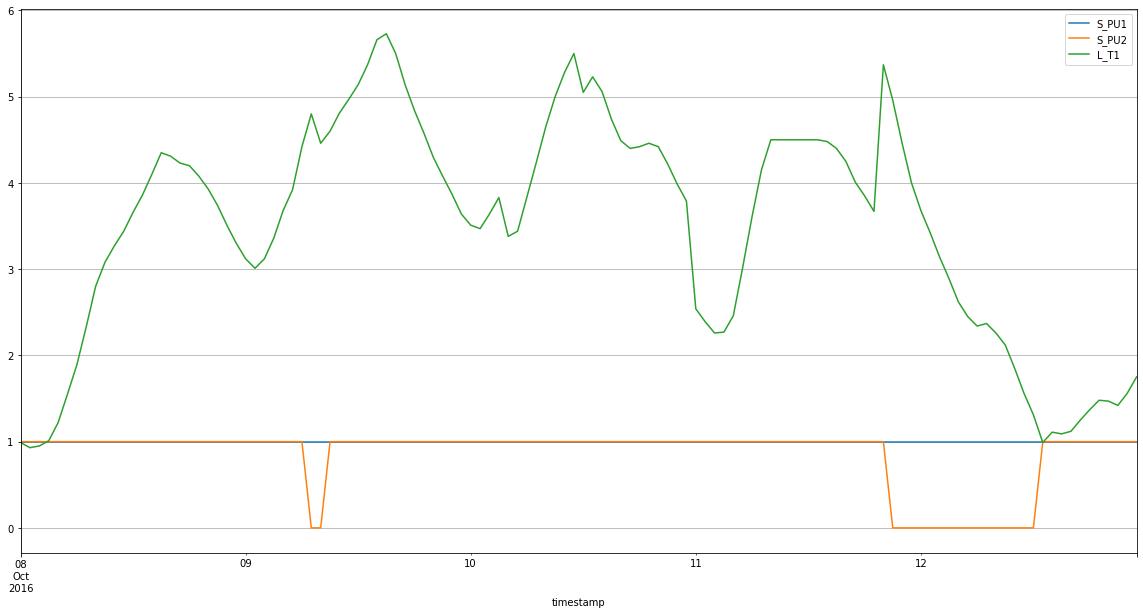

In [22]:
train_some_anom['2016-10-08':'2016-10-12'][["S_PU1", "S_PU2", "L_T1"]].plot(figsize=(20,10), grid=True)